In [1]:
import rasterio
import pyproj
import numpy as np
from rasterio.plot import show
from pyproj import Proj, transform

In [2]:
# Відкриття зображення
with rasterio.open('./soil_moisture.tif') as dataset:
    # Отримання вологості як numpy масив
    moisture = dataset.read(1)
    # Встановлення нульових значень на місці помилок
    moisture[moisture == dataset.nodata] = 0

    # Визначення та виведення середнього значення вологості
    avg_moisture = np.mean(moisture)
    print('Середнє значення вологості:', avg_moisture)

Середнє значення вологості: 38598.998165067474


In [3]:
with rasterio.open('./soil_moisture.tif') as dataset:
    # Отримання вологості як numpy масив
    moisture = dataset.read(1)
    # Встановлення нульових значень на місці помилок
    moisture[moisture == dataset.nodata] = 0
    # Визначення мінімального та максимального значення вологості
    min_moisture = np.min(moisture[moisture != 0])
    max_moisture = np.max(moisture[moisture != 0])
    # Визначення середнього значення вологості
    mean_moisture = np.mean(moisture[moisture != 0])

    # Виведення системи координат та bounding box
    print('Система координат:', dataset.crs)
    print('Bounding box:', dataset.bounds)
    crs = dataset.crs
    project = pyproj.Transformer.from_crs(crs, 'EPSG:4326')

    # Визначення кількості точок з помилками розрахунку
    num_errors = np.count_nonzero(moisture == 0)
    print('Кількість точок з помилками розрахунку:', num_errors)

    # Визначення координат точок з помилками розрахунку
    y_error, x_error = np.where(moisture == 0)
    lats_error, lons_error = project.transform(dataset.xy(y_error, x_error))

    # Виведення координат точок з помилками розрахунку
    for lat, lon in zip(lats_error, lons_error):
        print('Точка з помилкою розрахунку: ({}, {})'.format(lat, lon))

    # Визначення кількості точок з коректними значеннями вологості
    num_valid = np.count_nonzero(moisture != 0)
    print('Кількість точок з коректними значеннями вологості:', num_valid)

    # Визначення мінімального та максимального значення вологості без помилок
    valid_moisture = moisture[moisture != 0]
    min_valid_moisture = np.min(valid_moisture)
    max_valid_moisture = np.max(valid_moisture)
    print('Мінімальне значення вологості:', min_valid_moisture)
    print('Максимальне значення вологості:', max_valid_moisture)

    # Визначення середнього значення вологості без помилок
    mean_valid_moisture = np.mean(valid_moisture)
    print('Середнє значення вологості:', mean_valid_moisture)

Система координат: EPSG:4326
Bounding box: BoundingBox(left=29.566633136000007, bottom=49.434589403000004, right=31.185382877000006, top=50.486672568)
Кількість точок з помилками розрахунку: 0


TypeError: Transformer.transform() missing 1 required positional argument: 'yy'

In [ ]:
# Відкриваємо растровий файл
with rasterio.open('./soil_moisture.tif') as src:
    # Зчитуємо растрові дані у форматі NumPy array
    raster_data = src.read()

    # Отримуємо інформацію про проекцію та bounding box
    crs = src.crs
    bbox = src.bounds

    # Замінюємо значення помилок на 0
    raster_data[raster_data == -9999] = 0

    # Зберігаємо новий растр
    with rasterio.open('new_raster.tif', 'w', driver='GTiff', width=src.width, height=src.height, count=1,dtype=raster_data.dtype, crs=crs, transform=src.transform) as dst:
        dst.write(raster_data, 1)

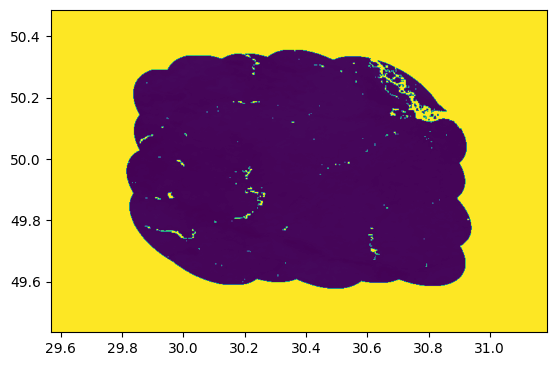

In [4]:
# Відкриваємо новий растр
with rasterio.open('output_corrected.tif') as src:
    # Відображаємо растр
    rasterio.plot.show(src)